# Fashion MNIST Dataset using NN
1. Load dataset
2. Train model
3. Evaluate model
4. Save and Retrieve model

In [1]:
import keras
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist 
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
tf.__version__

'1.14.0'

# Load dataset

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

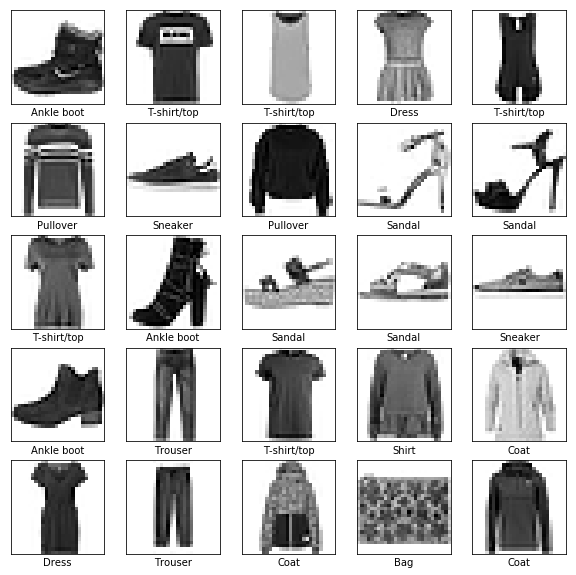

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # no margin of x-axis
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary) 
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [8]:
x_train.max()

255

In [3]:
#scaling the data for ease
x_train = x_train / 255.0

x_test = x_test / 255.0

In [11]:
x_train.max()

1.0

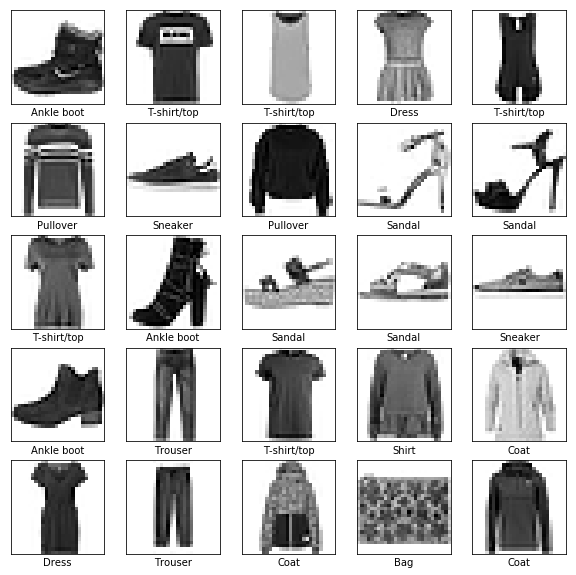

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Train model

In [5]:
# prepare model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
# compile and train model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.2324 - acc: 0.9136
Epoch 2/10
60000/60000 [==============================] - 7s 108us/step - loss: 0.2242 - acc: 0.9160
Epoch 3/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2163 - acc: 0.9186
Epoch 4/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.2090 - acc: 0.9

# Evaluate

In [8]:
# evaluate the test data
print(model.evaluate(x_test, y_test)) 

10000/10000 [==============================] - 0s 44us/step
[0.34813039296120407, 0.8904]


# Save and retrieve in tflite,h5 format

In [9]:
# Save tf.keras model in HDF5 format(.h5)
import h5py
keras_model_loc = "./datasets/mnist_keras_model.h5"
keras.models.save_model(model= model, filepath = keras_model_loc)

In [10]:
# retrive model
model = keras.models.load_model(keras_model_loc)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Convert the model to .tflite format
converter = tf.lite.TocoConverter.from_keras_model_file(keras_model_loc)
tflite_model = converter.convert() # Create the tflite converter
tflite_model_name = "./datasets/mymodel.tflite"
if open(tflite_model_name, "wb").write(tflite_model):
    print('Success')

Success


In [ ]:
# Load TFLite model and allocate tensors.
interpreter = tf.contrib.lite.Interpreter(model_path=tflite_model_name) 
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details() 
output_details = interpreter.get_output_details()

# Test model on random input data
input_data = x_test
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index']) 
print(output_data)

In [36]:
# Set quantize to true 
#converter.post_training_quantize=True